# News Mood

### Analysis

After repeated executions of the program, the BBC and Fox News consistently score lower in with VADER.  Fox News was hypothesized as such, but the low score for the BBC could be a reflection of searching the 'Breaking News' account as opposed to the 'World' account.

CNN and the NYT consistently score higher relative to the other accounts. As a next step, I would look at the frequency of CNN's breaking news tweets compared to the BBC, as well as categorically compare the NYT's tweets about arts, lifestyle, and sporting news to others.

CBS News is not only consistent, but consistenly close to neutral relative to the other news sources.  That is to say, their score is not usually the closest to zero, but it is usually the median score among media sources.  This could suggest a blended approach to sensationalist headlines.  

In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')
import imp
api=imp.load_source('api','/Users/thomas/Desktop/Boot Camp/Keys/api.py')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from api import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target Account
targets = ["@BBCBreaking","@CBSNews","@cnnbrk","@FoxNews","@nytimes"]
sent = []

for target in targets:
    
    counter = 1


    for x in range(1,6):

    
        public_tweets = api.user_timeline(target, page=x)

    
        for tweet in public_tweets:

        
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
        
        
            sent.append({"Source": target,
                            "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
 
            counter = counter + 1

newsmood=pd.DataFrame(data=sent)

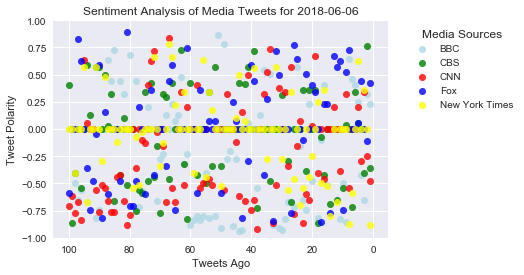

In [4]:
source=['BBC', 'CBS', 'CNN', 'Fox', 'New York Times']
color=['lightblue','green','red','blue','yellow']

sns.set()
fig = plt.subplots()
for x in range(5):
    
    sns.regplot(x='Tweets Ago', y='Compound', data=newsmood.loc[newsmood['Source']==targets[x]], fit_reg=False, color=color[x], marker='o', scatter_kws={'s':50})

plt.legend(title="Media Sources", loc='upper right', bbox_to_anchor=(1.4,1), labels=source)
plt.title(f"Sentiment Analysis of Media Tweets for {dt.date.today()}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.ylim(-1,1)
plt.xlim(105,-5)


plt.show()
 
plt.savefig("SentimentAnalysis.png")

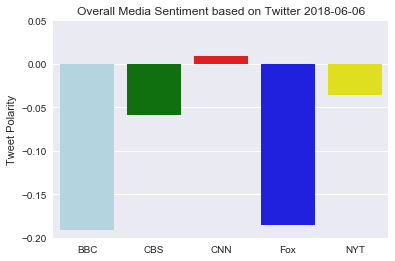

In [5]:
source=['BBC', 'CBS', 'CNN', 'Fox', 'NYT']
sns.set()
sns.barplot(x=source, y=newsmood.groupby(['Source'])['Compound'].mean(), palette=color)
plt.title(f"Overall Media Sentiment based on Twitter {dt.date.today()}")
plt.ylabel("Tweet Polarity")
plt.ylim(-0.2,0.05)
plt.show()
 
plt.savefig("OverallMedia.png")